<a href="https://www.kaggle.com/code/rarataskiadewanti/titanic-project?scriptVersionId=198611952" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Data Input**

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# **Handle Missing Value**

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [6]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
df = df.drop('Cabin', axis=1)

In [8]:
df = df.drop('PassengerId', axis=1)

In [9]:
df = df.drop('Name', axis=1)

In [10]:
df = df.drop('Ticket', axis=1)

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# **Feature Engineering**

## Label Encoder 

Label Encoder converts categorical data to numeric.

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

## Binning (Categorization)

In [15]:
def age_group(age):
    if age < 18:
        return '0'
    elif age < 35:
        return '1'
    elif age < 60:
        return '2'
    else:
        return '3'

df['Age'] = df['Age'].apply(age_group)

In [16]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

def fare_category(fare):
    if fare < Q1:
        return '0'
    elif fare <= Q3:
        return '1'
    else:
        return '2'

df['Fare'] = df['Fare'].apply(fare_category)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1,1,0,0,2
1,1,1,0,2,1,0,2,0
2,1,3,0,1,0,0,1,2
3,1,1,0,2,1,0,2,2
4,0,3,1,2,0,0,1,2


# **Correlation**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

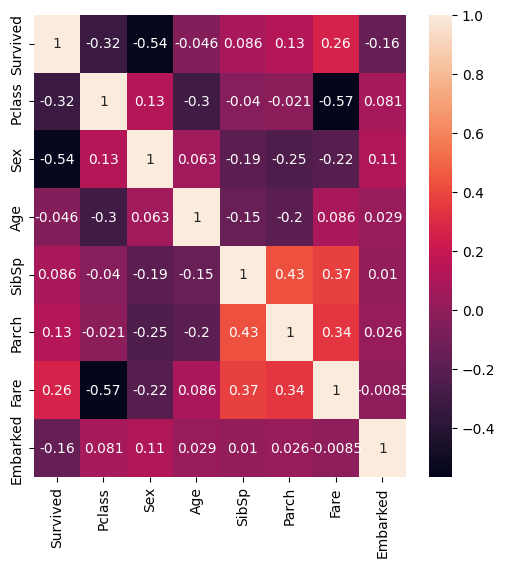

In [19]:
plt.figure(figsize=(6,6))
cor = df.corr(method='kendall')
sns.heatmap(cor,annot=True)
plt.show()

# **Who were the Titanic passengers?**

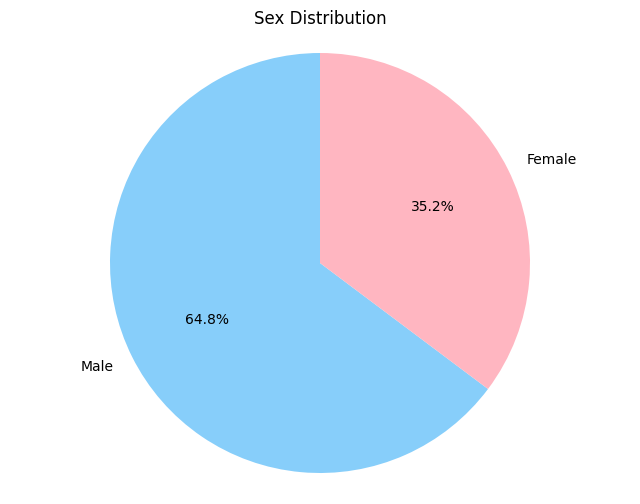

In [20]:
sex_counts = df['Sex'].value_counts()
labels = ['Male', 'Female']
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#87CEFA', '#FFB6C1'])
plt.title('Sex Distribution')
plt.axis('equal')  
plt.gca().set_axis_off()
plt.show()

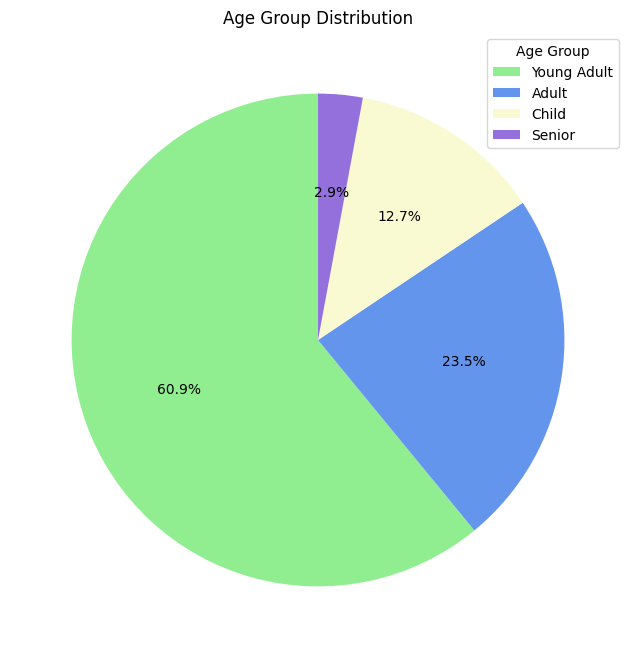

In [21]:
age_counts = df['Age'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(age_counts, autopct='%1.1f%%', startangle=90, colors=['#90EE90', '#6495ED', '#FAFAD2', '#9370DB'])
plt.title('Age Group Distribution')
plt.legend(['Young Adult', 'Adult', 'Child', 'Senior'], title='Age Group')
plt.show()

In [22]:
print(age_counts)

Age
1    543
2    209
0    113
3     26
Name: count, dtype: int64


# **Passenger Survival Rate**

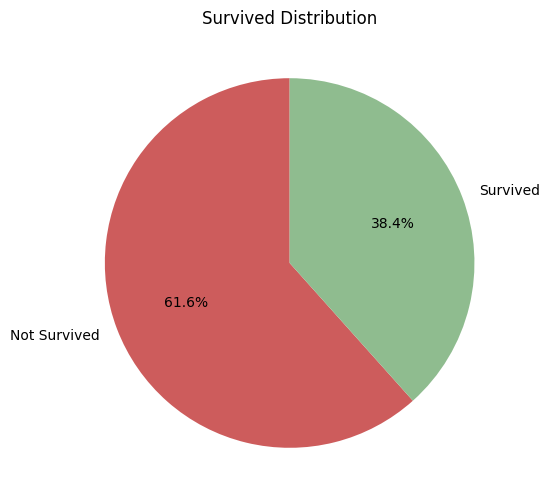

In [23]:
survived_counts = df['Survived'].value_counts()
labels = ['Not Survived', 'Survived']
sizes = survived_counts.values
plt.figure(figsize=(6,6))  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#CD5C5C','#8FBC8F'])
plt.title('Survived Distribution')
plt.show()

In [24]:
print(survived_counts)

Survived
0    549
1    342
Name: count, dtype: int64


## **Survival Rate by Pclass**

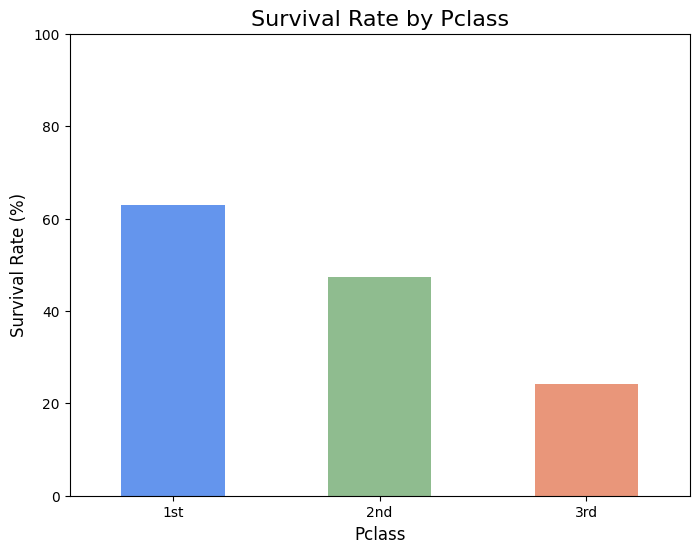

In [25]:
survival_pclass_rate = df.groupby('Pclass')['Survived'].mean()*100
survival_pclass_rate.plot(kind='bar', figsize=(8, 6), color=['#6495ED', '#8FBC8F', '#E9967A'])
plt.title('Survival Rate by Pclass', fontsize=16)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xticks(rotation=0, ticks=[0, 1, 2], labels=['1st', '2nd', '3rd'])
plt.ylim(0, 100)
plt.show()

In [26]:
print(survival_pclass_rate)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


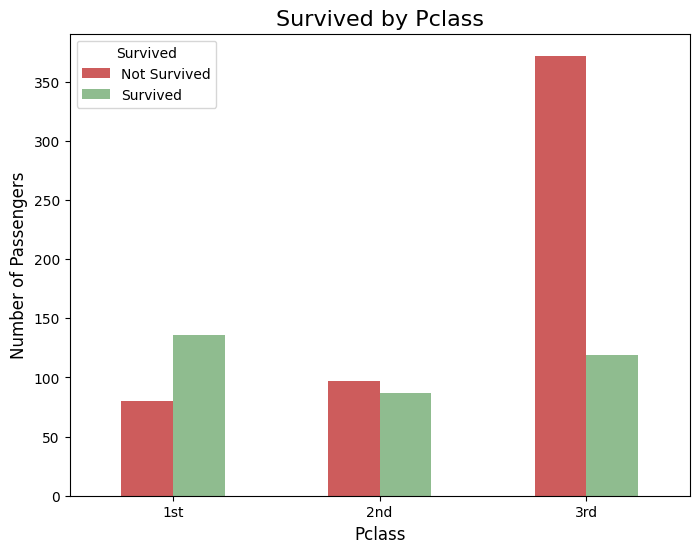

In [27]:
survived_pclass_counts = pd.crosstab(df['Pclass'], df['Survived'])
survived_pclass_counts.plot(kind='bar', figsize=(8,6), color=['#CD5C5C','#8FBC8F'])
plt.title('Survived by Pclass', fontsize=16)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks(rotation=0, ticks=[0, 1, 2], labels=['1st', '2nd', '3rd'])
plt.legend(['Not Survived', 'Survived'], title='Survived')
plt.show()

In [28]:
print(survived_pclass_counts)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


## **Survival Rate by Sex**

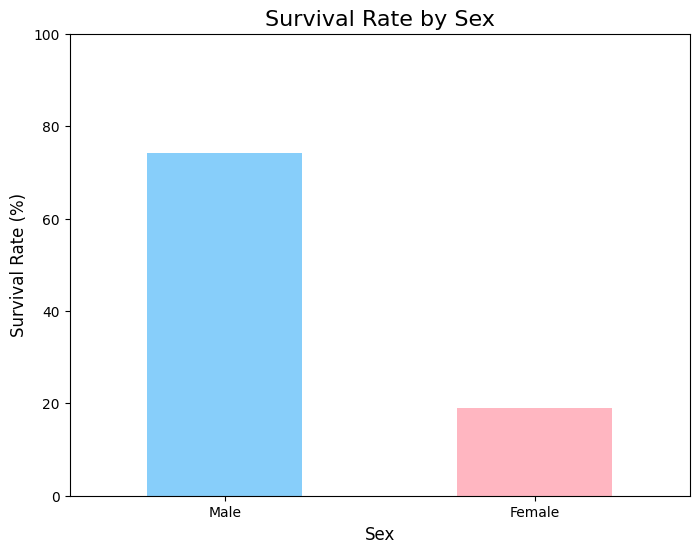

In [29]:
survival_sex_rate = df.groupby('Sex')['Survived'].mean()*100
survival_sex_rate.plot(kind='bar', figsize=(8, 6), color=['#87CEFA', '#FFB6C1'])
plt.title('Survival Rate by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xticks(rotation=0, ticks=[0, 1], labels=['Male', 'Female'])
plt.ylim(0, 100)
plt.show()

In [30]:
print(survival_sex_rate)

Sex
0    74.203822
1    18.890815
Name: Survived, dtype: float64


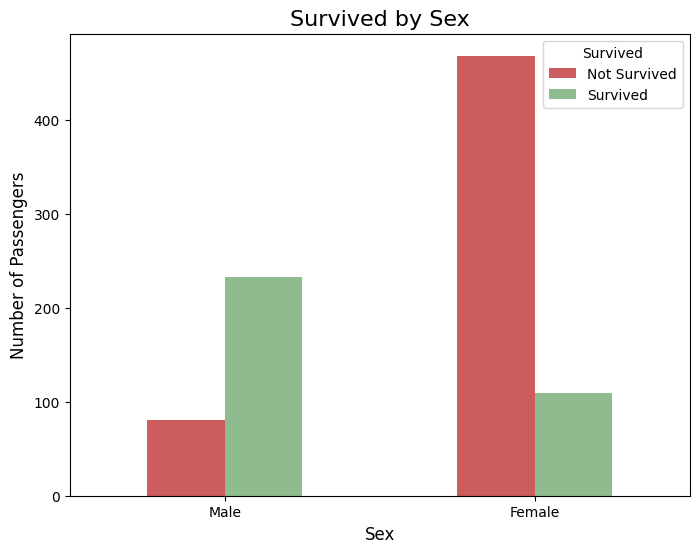

In [31]:
survived_sex_counts = pd.crosstab(df['Sex'], df['Survived'])
survived_sex_counts.plot(kind='bar', figsize=(8,6), color=['#CD5C5C','#8FBC8F'])
plt.title('Survived by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks(rotation=0, ticks=[0, 1], labels=['Male', 'Female'])
plt.legend(['Not Survived', 'Survived'], title='Survived')
plt.show()

In [32]:
print(survived_sex_counts)

Survived    0    1
Sex               
0          81  233
1         468  109


## **Survival Rate by Age Group**

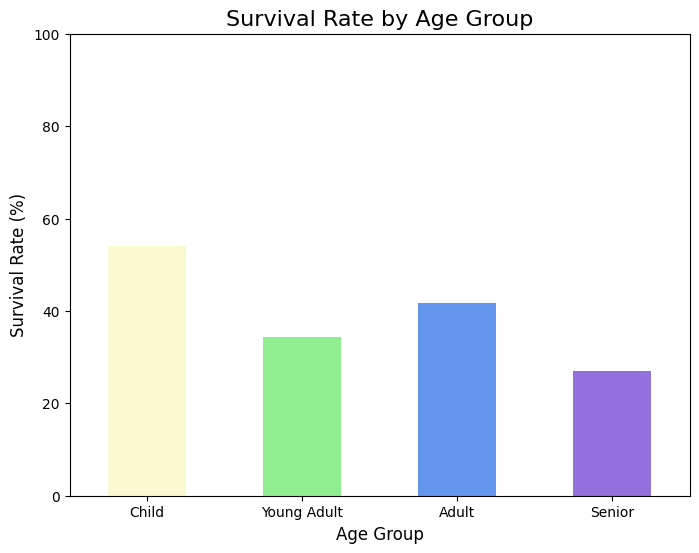

In [33]:
survival_age_rate = df.groupby('Age')['Survived'].mean()*100
survival_age_rate.plot(kind='bar', figsize=(8, 6), color=['#FAFAD2', '#90EE90', '#6495ED', '#9370DB'])
plt.title('Survival Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xticks(rotation=0, ticks=[0, 1, 2, 3], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
plt.ylim(0, 100)
plt.show()

In [34]:
print(survival_age_rate)

Age
0    53.982301
1    34.438306
2    41.626794
3    26.923077
Name: Survived, dtype: float64


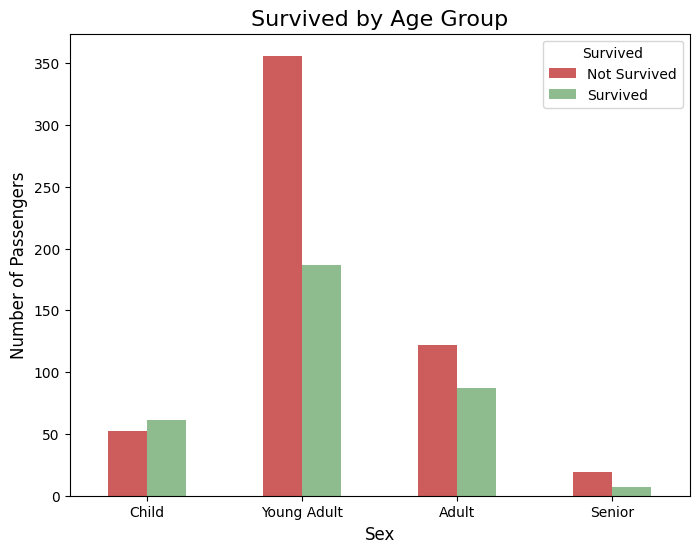

In [35]:
survived_age_counts = pd.crosstab(df['Age'], df['Survived'])
survived_age_counts.plot(kind='bar', figsize=(8,6), color=['#CD5C5C','#8FBC8F'])
plt.title('Survived by Age Group', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks(rotation=0, ticks=[0, 1, 2, 3], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
plt.legend(['Not Survived', 'Survived'], title='Survived')
plt.show()

In [36]:
print(survived_age_counts)

Survived    0    1
Age               
0          52   61
1         356  187
2         122   87
3          19    7


## **Survival Rate by Embarked**

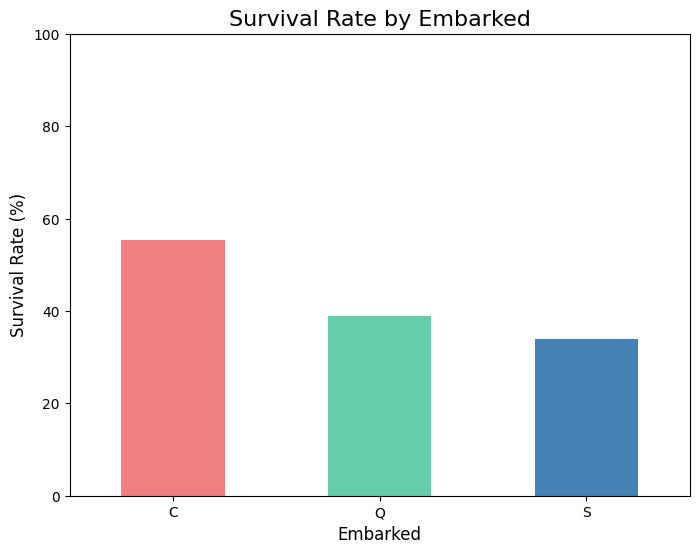

In [37]:
survival_embarked_rate = df.groupby('Embarked')['Survived'].mean()*100
survival_embarked_rate.plot(kind='bar', figsize=(8, 6), color=['#F08080', '#66CDAA', '#4682B4'])
plt.title('Survival Rate by Embarked', fontsize=16)
plt.xlabel('Embarked', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xticks(rotation=0, ticks=[0, 1, 2], labels=['C', 'Q', 'S'])
plt.ylim(0, 100)
plt.show()

In [38]:
print(survival_embarked_rate)

Embarked
0    55.357143
1    38.961039
2    33.900929
Name: Survived, dtype: float64


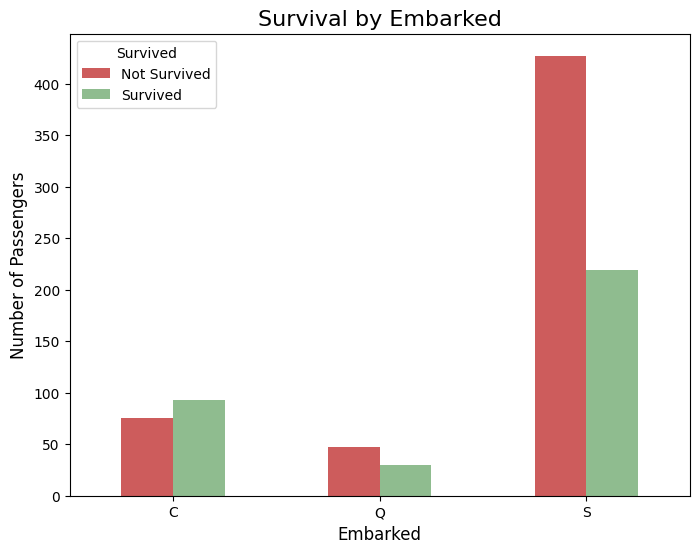

In [39]:
survived_embarked_counts = pd.crosstab(df['Embarked'], df['Survived'])
survived_embarked_counts.plot(kind='bar', figsize=(8,6), color=['#CD5C5C','#8FBC8F'])
plt.title('Survival by Embarked', fontsize=16)
plt.xlabel('Embarked', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks(rotation=0, ticks=[0, 1, 2], labels=['C', 'Q', 'S'])
plt.legend(['Not Survived', 'Survived'], title='Survived')
plt.show()


In [40]:
print(survived_embarked_counts)

Survived    0    1
Embarked          
0          75   93
1          47   30
2         427  219


## **Survival by Fare Group**

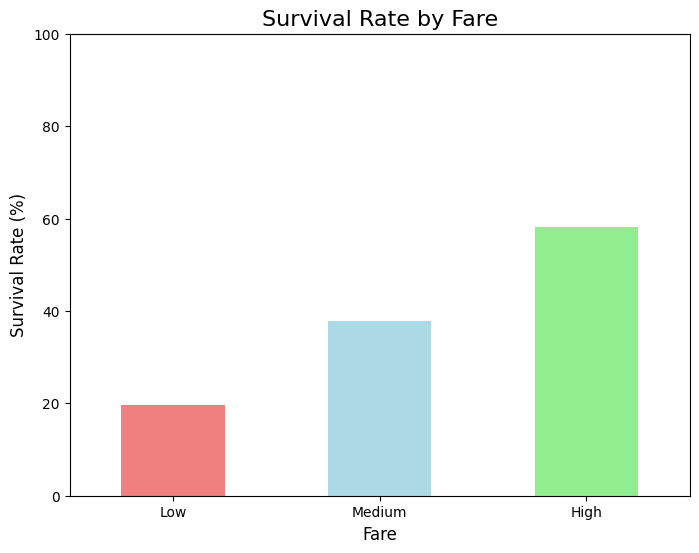

In [41]:
survival_fare_rate = df.groupby('Fare')['Survived'].mean()*100
survival_fare_rate.plot(kind='bar', figsize=(8, 6), color=['#F08080', '#ADD8E6', '#90EE90'])
plt.title('Survival Rate by Fare', fontsize=16)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xticks(rotation=0, ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
plt.ylim(0, 100)
plt.show()

In [42]:
print(survival_fare_rate)

Fare
0    19.730942
1    37.892377
2    58.108108
Name: Survived, dtype: float64


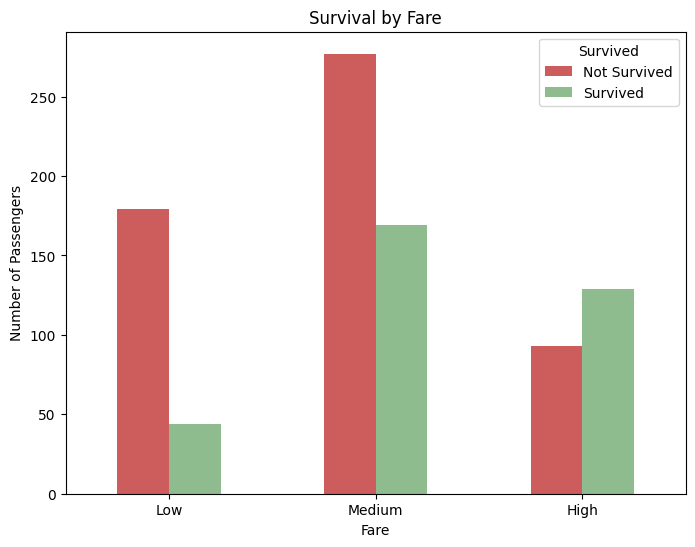

In [43]:
survived_fare_counts = pd.crosstab(df['Fare'], df['Survived'])
survived_fare_counts.plot(kind='bar', figsize=(8,6), color=['#CD5C5C','#8FBC8F'])
plt.title('Survival by Fare')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0, ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
plt.legend(['Not Survived', 'Survived'], title='Survived')
plt.show()

In [44]:
print(survived_fare_counts)

Survived    0    1
Fare              
0         179   44
1         277  169
2          93  129


## **Feature Selection**

In [45]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [46]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,1,1,0,0,2
1,1,0,2,1,0,2,0
2,3,0,1,0,0,1,2
3,1,0,2,1,0,2,2
4,3,1,2,0,0,1,2
...,...,...,...,...,...,...,...
886,2,1,1,0,0,1,2
887,1,0,1,0,0,1,2
888,3,0,1,1,2,1,2
889,1,1,1,0,0,1,0


In [47]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# **Train Test Split**

Splitting data for training data and testing data.

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Training Data**

In [49]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,2,0,0,1,2
733,2,1,1,0,0,1,2
382,3,1,1,0,0,1,2
704,3,1,1,1,0,0,2
813,3,0,0,4,2,2,2
...,...,...,...,...,...,...,...
106,3,0,1,0,0,0,2
270,1,1,1,0,0,1,2
860,3,1,2,2,0,1,2
435,1,0,0,1,2,2,2


In [50]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

## **Testing Data**

In [51]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,1,1,1,1,0
439,2,1,1,0,0,1,2
840,3,1,1,0,0,1,2
720,2,0,0,0,1,2,2
39,3,0,0,1,0,1,0
...,...,...,...,...,...,...,...
433,3,1,0,0,0,0,2
773,3,1,1,0,0,0,0
25,3,0,2,1,5,2,2
84,2,0,0,0,0,1,2


In [52]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

# **Modeling**

## **1. Build Classification Model using Random Forest**

In [53]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

* n_estimators determines the number of trees to be created in Random Forest. When we set n_estimators=100, this means we will create 100 different decision trees. Each tree will make a prediction, and the final result is a combination of all the tree's predictions.
* random_state is the number used to set the random “seed”. Using random_state ensures that the results we get from running the model are always consistent. For example, every time we run the code with random_state=42, the results will be the same.

### **Evaluation**

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### **Predict Testing Data**

In [55]:
y_pred1 = model1.predict(X_test)

In [56]:
df_comparison1 = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred1
})
df_comparison1

,Actual,Predicted
709,1,1
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


#### **Create Confusion Matrix**

In [57]:
conf_matrix1 = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(conf_matrix1)

Confusion Matrix:
[[93 12]
 [17 57]]


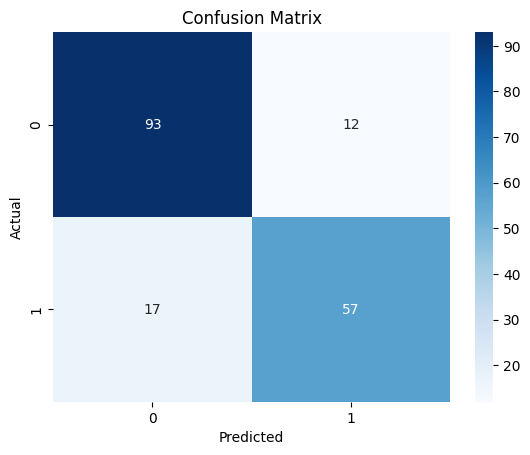

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **Calculate Accuracy** 

In [59]:
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy1:.2f}")

Accuracy: 0.84


### **Feature Importances (Random Forest Only)**

In [60]:
feature_importance = model1.feature_importances_

feature_names = X_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
1,Sex,0.407551
0,Pclass,0.150100
2,Age,0.106232
3,SibSp,0.103053
4,Parch,0.084165
5,Fare,0.081450
6,Embarked,0.067448


## **2. Build Classification Model using Logistic Regression**

In [61]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

### **Evaluation**

#### **Predict Testing Data**

In [62]:
y_pred2 = model2.predict(X_test)

In [63]:
df_comparison2 = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred2
})
df_comparison2

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


#### **Create Confusion Matrix**

In [64]:
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(conf_matrix2)

Confusion Matrix:
[[90 15]
 [19 55]]


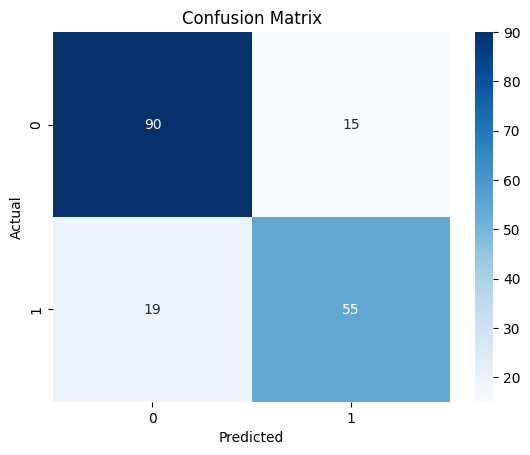

In [65]:
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **Calculate Accuracy**

In [66]:
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2:.2f}")

Accuracy: 0.81


## **3. Build Classification Model using K-Nearest Neighbors (KNN)**

In [67]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### **Evaluation**

#### **Predict Testing Data**

In [68]:
y_pred3 = model3.predict(X_test)

In [69]:
df_comparison3 = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred3
})
df_comparison3

,Actual,Predicted
709,1,1
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
433,0,0
773,0,0
25,1,0
84,1,0


#### **Creat Confusion Matrix**

In [70]:
conf_matrix3 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(conf_matrix3)

Confusion Matrix:
[[89 16]
 [15 59]]


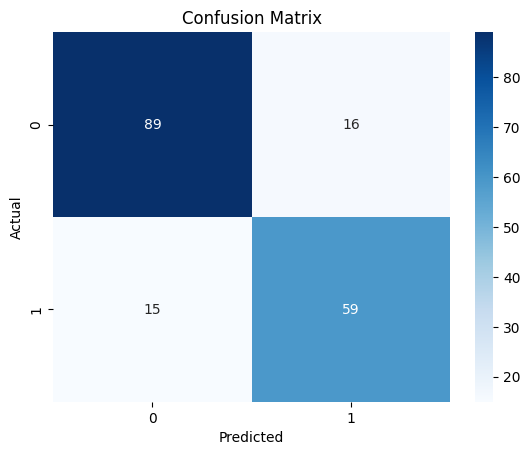

In [71]:
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **Calculate Accuracy**

In [72]:
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy3:.2f}")

Accuracy: 0.83


## **4. Build Classification Model using Naive Bayes**

In [73]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(X_train, y_train)

GaussianNB()

### **Evaluation**

#### **Predict Testing Data**

In [74]:
y_pred4 = model4.predict(X_test)

In [75]:
df_comparison4 = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred4
})
df_comparison4

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
433,0,0
773,0,0
25,1,1
84,1,1


#### **Create Confusion Matrix**

In [76]:
conf_matrix4 = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix:")
print(conf_matrix4)

Confusion Matrix:
[[76 29]
 [13 61]]


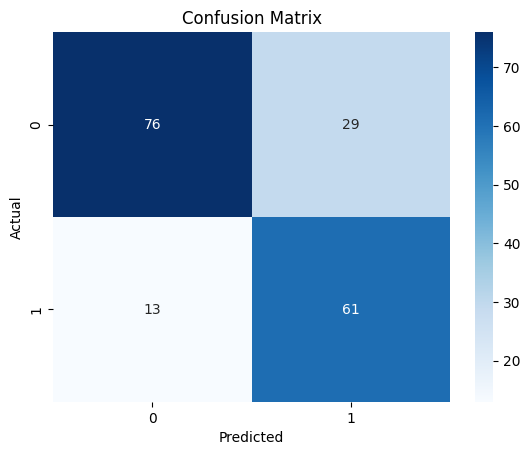

In [77]:
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **Calculate Accuracy**

In [78]:
accuracy4 = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy4:.2f}")

Accuracy: 0.77


## **5. Build Classification Model using Decision Tree**

In [79]:
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier()
model5.fit(X_train, y_train)

DecisionTreeClassifier()

### **Evaluation**

#### **Predict Testing Data**

In [80]:
y_pred5 = model5.predict(X_test)

In [81]:
df_comparison5 = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred5
})
df_comparison5

,Actual,Predicted
709,1,1
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


#### **Create Confusion Matrix**

In [82]:
conf_matrix5 = confusion_matrix(y_test, y_pred5)
print("Confusion Matrix:")
print(conf_matrix5)

Confusion Matrix:
[[89 16]
 [19 55]]


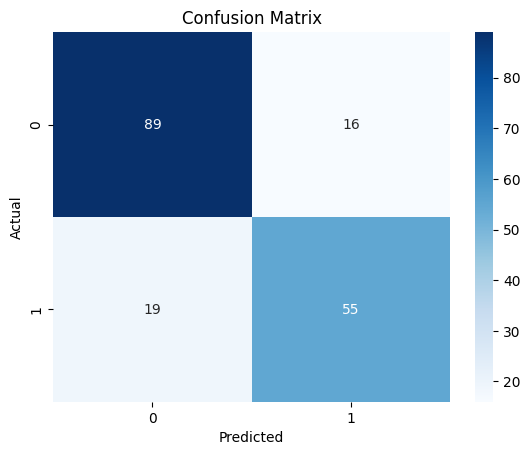

In [83]:
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **Calculate Accuracy**

In [84]:
accuracy5 = accuracy_score(y_test, y_pred5)
print(f"Accuracy: {accuracy5:.2f}")

Accuracy: 0.80
